In [68]:
from RegressionEnv import RegressionClass
from sklearn.linear_model import LinearRegression, HuberRegressor
import numpy as np

In [69]:
feature_steps = 15
target_steps = 15

ModelLR = RegressionClass(feature_steps=feature_steps,target_steps=target_steps,tickers = ['spy'])

for m in [LinearRegression,HuberRegressor]:
    ModelLR.Prediction(m)


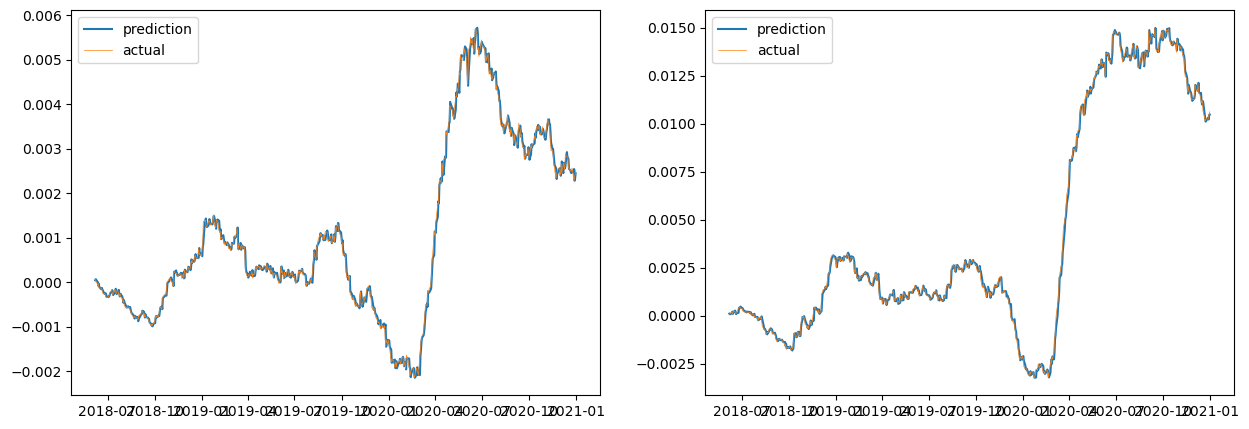

C:\Users\yoshi\AppData\Local\Temp\ipykernel_37436\4231090339.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[var].legend(loc='upper left')


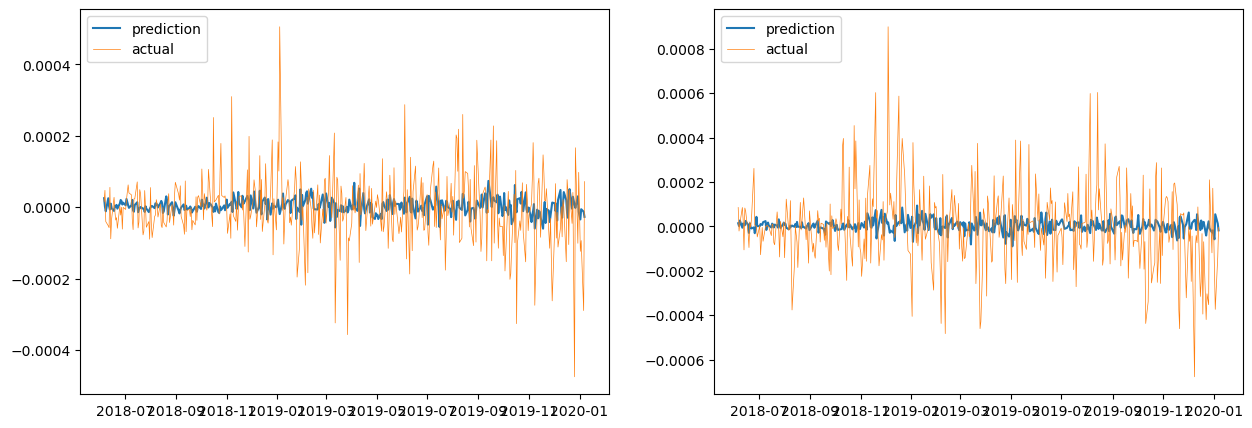

[[1.         0.96431055]
 [0.96431055 1.        ]]
[[1.         0.03328384]
 [0.03328384 1.        ]]


In [70]:
import matplotlib.pyplot as plt

T = len(ModelLR.tickers)

mod = 0  #SimpleRNN and LinearRegression = 0, LSTM and HuberRegressor= 1

ticker = 'spy'

fig, axes = plt.subplots(1, 2, figsize=(15, 5*T))
for var in [0,1]:
    k = list(ModelLR.test_pred[ticker].keys())
    pred = ModelLR.test_pred[ticker][k[mod]][:,var]
    test = ModelLR.y_test[ticker][:,var]
    test_full = np.cumsum(test)
    pred_full = test_full[:-1]+pred[:-1]
    test_full = test_full[1:]

    
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]][1:],pred_full, label = "prediction")
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]][1:],test_full, label = "actual", linewidth=0.5)
    axes[var].legend(loc='upper left')

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5*T))
for var in [0,1]:
    k = list(ModelLR.test_pred[ticker].keys())
    pred = ModelLR.test_pred[ticker][k[mod]][:,var]
    test = ModelLR.y_test[ticker][:,var]
    test_full = np.cumsum(test)
    pred_full = test_full[:-target_steps]+pred[:-target_steps]
    test_full = test_full[target_steps:]

    axes[var].legend(loc='upper left')
    TT = 400
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]][:TT],pred[:TT], label = "prediction")
    axes[var].plot(ModelLR.test_dates[ticker][k[mod]][:TT],test[:TT], label = "actual", linewidth=0.5)
    axes[var].legend(loc='upper left')

# Show the plot
plt.show()

print(np.corrcoef(test_full,pred_full))
print(np.corrcoef(test,pred))

In [71]:
y = 0
N = len(pred_full)
for n in range(target_steps,N):
    if np.sign(test_full[n]-test_full[n-target_steps]) == np.sign(pred_full[n]-pred_full[n-target_steps]):
        y += 1

print(y)
print(N)
print(y/N)

394
634
0.6214511041009464
